# アユムのファイル

In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
from ultralytics import YOLO
import cv2
import os

# Load a model (既に読み込んでいる場合は重複しないよう調整してください)
model = YOLO("yolo11n-pose.pt")

# --- 推論用設定 ---
# 入力例: 画像ファイル, 動画ファイル, フォルダ ("images/"), またはカメラ(0)
source = "/2011tokyo_mister_fp-011-320x480.jpg"    # ここを使いたい入力に変更
imgsz = 640
conf = 0.25
save_dir = "runs/pose_infer"   # 保存先ディレクトリ

os.makedirs(save_dir, exist_ok=True)

# 推論実行
results = model.predict(source=source, imgsz=imgsz, conf=conf)

# results は iterable。複数フレーム/画像に対して処理する。
for i, r in enumerate(results):
    # 可視化画像を取得して保存 (r.plot() はRGB画像を返す)
    try:
        annotated = r.plot()  # numpy array (RGB)
        out_path = os.path.join(save_dir, f"annotated_{i}.jpg")
        # OpenCV はBGRで扱うため変換して保存
        cv2.imwrite(out_path, cv2.cvtColor(annotated, cv2.COLOR_RGB2BGR))
        print(f"Saved annotated image: {out_path}")
    except Exception as e:
        print("Could not plot/save annotated image:", e)

    # キーポイントがあれば取り出して表示 (モデルの出力形式に依存するため安全にアクセス)
    try:
        # ultralytics のバージョンにより属性名が異なることがあるので安全に取得
        if hasattr(r, "keypoints") and r.keypoints is not None:
            kps = r.keypoints
        elif hasattr(r, "masks") and r.masks is not None:
            kps = r.masks
        else:
            kps = None

        if kps is not None:
            # kps を表示しやすい形に変換して出力
            try:
                arr = np.array(kps)  # 多くの場合 numpy に変換可能
            except Exception:
                arr = kps
            print(f"Frame {i} keypoints / mask info:", type(arr), getattr(arr, "shape", None))
            # 必要ならここで arr を解析して各姿勢のキーポイント座標を処理
        else:
            print(f"Frame {i}: no keypoints found in result")
    except Exception as e:
        print("Error while extracting keypoints:", e)
# ...existing code...

Speed: 8.3ms preprocess, 52.4ms inference, 7.3ms postprocess per image at shape (1, 3, 640, 448)
Saved annotated image: runs/pose_infer/annotated_0.jpg
Frame 0 keypoints / mask info: <class 'ultralytics.engine.results.Keypoints'> torch.Size([1, 17, 3])


In [3]:
!pip install pycocotools
from pycocotools.coco import COCO
import requests, os
from tqdm import tqdm

# アノテーションファイルの読み込み
coco = COCO('annotations/person_keypoints_train2017.json')
img_ids = coco.getImgIds()[:1000]  # 先頭1000枚だけ取得

save_dir = 'subset_coco_pose'
os.makedirs(save_dir, exist_ok=True)

for img_id in tqdm(img_ids):
    info = coco.loadImgs(img_id)[0]
    url = info['coco_url']
    r = requests.get(url)
    open(os.path.join(save_dir, info['file_name']), 'wb').write(r.content)




[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: 'annotations/person_keypoints_train2017.json'

In [3]:
!pip install deeplake


  Using cached deeplake-3.9.52-py3-none-any.whl
  Using cached pathos-0.3.4-py3-none-any.whl.metadata (11 kB)
  Using cached humbug-0.3.2-py3-none-any.whl.metadata (6.8 kB)
Using cached humbug-0.3.2-py3-none-any.whl (15 kB)
Using cached pathos-0.3.4-py3-none-any.whl (82 kB)


ERROR: Could not install packages due to an OSError: [WinError 32] プロセスはファイルにアクセスできません。別のプロセスが使用中です。: 'C:\\Users\\agugu\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\deeplake\\api\\tests\\test_rechunk.py'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import deeplake

# トレーニングセットのロード
train_ds = deeplake.load("hub://activeloop/lsp-train")

# テストセットのロード
test_ds = deeplake.load("hub://activeloop/lsp-test")

c:\Users\agugu\AppData\Local\Programs\Python\Python311\Lib\site-packages\humbug\report.py:47: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # type: ignore
c:\Users\agugu\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.3.5) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
|

Opening dataset in read-only mode as you don't have write permissions.


/

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train



\

hub://activeloop/lsp-train loaded successfully.



Opening dataset in read-only mode as you don't have write permissions.


|

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-test



hub://activeloop/lsp-test loaded successfully.



\

In [5]:
!pip install matplotlib pillow deeplake



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\agugu\AppData\Local\Programs\Python\Python311\Lib\site-packages\humbug\report.py:47: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources  # type: ignore
c:\Users\agugu\AppData\Local\Programs\Python\Python311\Lib\site-packages\deeplake\util\check_latest_version.py:32: UserWarning: A newer version of deeplake (4.4.0) is available. It's recommended that you update to the latest version using `pip install -U deeplake`.
  warnings.warn(
\

Opening dataset in read-only mode as you don't have write permissions.


\

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/lsp-train



|

hub://activeloop/lsp-train loaded successfully.



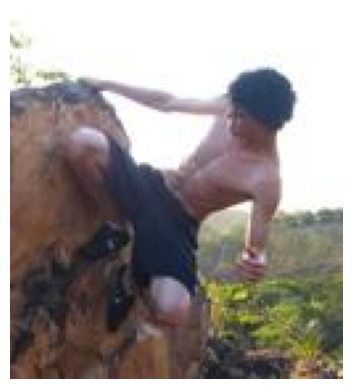

In [44]:
import deeplake
import matplotlib.pyplot as plt

# トレーニングセットをロード
train_ds = deeplake.load("hub://activeloop/lsp-train")

# 最初の画像を取得
img = train_ds.images[2].numpy()  # NumPy配列に変換

# 表示
plt.imshow(img)
plt.axis('off')  # 軸を非表示
plt.show()

In [9]:
import os
from glob import glob
import argparse
import numpy as np
from tqdm import tqdm
from ultralytics import YOLO
import cv2

def infer_folder(model_path, images_dir, out_dir, imgsz=640, conf=0.25, device='0'):
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(os.path.join(out_dir, "annotated"), exist_ok=True)
    os.makedirs(os.path.join(out_dir, "keypoints"), exist_ok=True)

    model = YOLO(model_path, device=device)
    paths = sorted(glob(os.path.join(images_dir, "*.*")))
    for p in tqdm(paths, desc="Images"):
        try:
            results = model.predict(source=p, imgsz=imgsz, conf=conf, verbose=False)
        except Exception as e:
            print("Model predict error:", p, e)
            continue

        # results iterable — 画像ごとの処理（動画ならフレームごと）
        for i, r in enumerate(results):
            # 可視化画像保存
            try:
                annotated = r.plot()  # RGB numpy
                out_img = os.path.join(out_dir, "annotated", os.path.splitext(os.path.basename(p))[0] + ".jpg")
                cv2.imwrite(out_img, cv2.cvtColor(annotated, cv2.COLOR_RGB2BGR))
            except Exception as e:
                print("Could not save annotated image:", e)

            # keypoints 保存（存在すれば numpy に）
            kp_arr = None
            try:
                if hasattr(r, "keypoints") and r.keypoints is not None:
                    # r.keypoints はモデルとバージョンで異なる型の可能性があるため安全に変換
                    try:
                        kp_arr = np.array(r.keypoints)
                    except Exception:
                        try:
                            kp_arr = np.array(r.keypoints.cpu())
                        except Exception:
                            kp_arr = r.keypoints
                # 保存
                out_npz = os.path.join(out_dir, "keypoints", os.path.splitext(os.path.basename(p))[0] + ".npz")
                np.savez_compressed(out_npz, keypoints=kp_arr, image_path=p)
            except Exception as e:
                print("Could not save keypoints:", e)

            # 1画像につき1回で良ければ break
            break

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--model", default="yolo11n-pose.pt")
    parser.add_argument("--images", required=True, help="画像フォルダのパス")
    parser.add_argument("--out", default="runs/lsp_pose_infer")
    parser.add_argument("--imgsz", type=int, default=640)
    parser.add_argument("--conf", type=float, default=0.25)
    parser.add_argument("--device", default="0", help="'cpu' or GPU id like '0' or 'cuda:0'")
    args = parser.parse_args()
    infer_folder(args.model, args.images, args.out, imgsz=args.imgsz, conf=args.conf, device=args.device)

usage: ipykernel_launcher.py [-h] [--model MODEL] --images IMAGES [--out OUT]
                             [--imgsz IMGSZ] [--conf CONF] [--device DEVICE]
ipykernel_launcher.py: error: the following arguments are required: --images


SystemExit: 2

C:\Users\agugu\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [23]:
import pandas as pd

# CSVの読み込み
df = pd.read_csv("coolness_scores.csv")

# 平均スコア列を追加
df["avg_score"] = df[["川島", "工藤", "車戸", "天野"]].mean(axis=1)

# 結果の確認
print(df)


import json

# JSON形式に変換
data_list = []
for _, row in df.iterrows():
    data_list.append({
        "file_name": row["filename"],
        "avg_score": row["avg_score"]
    })

with open("coolness_dataset.json", "w") as f:
    json.dump(data_list, f, indent=4)

            filename  川島  工藤  車戸  天野  avg_score
0   000000000036.jpg   1   2   3   4       2.50
1   000000000049.jpg   2   2   3   4       2.75
2   000000000077.jpg   3   2   3   4       3.00
3   000000000086.jpg   3   2   3   4       3.00
4   000000000110.jpg   3   2   3   4       3.00
5  0000000000113.jpg   3   2   3   4       3.00
6  0000000000136.jpg   3   2   3   4       3.00
7  0000000000151.jpg   3   1   2   3       2.25


In [36]:
from ultralytics import YOLO
import pandas as pd
import os
import numpy as np

# YOLO Poseモデル
pose_model = YOLO("yolo11n-pose.pt")

# 画像ディレクトリ
image_dir = "images"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".png"))]

data_list = []
num_kpts = 17  # キーポイントの数

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    results = pose_model.predict(source=img_path, imgsz=640, conf=0.05, verbose=False)[0]

    if len(results.keypoints) > 0:
        # 1人目を使用
        kpts_obj = results.keypoints[0]

        coords_norm = kpts_obj.xyn.cpu().numpy()  # 0~1に正規化済み
        confs = kpts_obj.conf.cpu().numpy()

        if coords_norm.shape[0] < num_kpts:
        # 補完用配列
            coords_norm_full = np.zeros((num_kpts, 2))
            confs_full = np.zeros(num_kpts)
            coords_norm_full[:coords_norm.shape[0], :] = coords_norm
            confs_full[:confs.shape[0]] = confs
            coords_norm = coords_norm_full
            confs = confs_full
        # それ以外（17個ある場合）はそのまま使用


        # flattenして1次元配列に変換
        kpts_flat = []
        for i in range(num_kpts):
            kpts_flat += [coords_norm[i,0], coords_norm[i,1], confs[i]]

        row = [img_file] + kpts_flat
        data_list.append(row)

    else:
        # 検出なしの場合も0で補完
        kpts_flat = [0.0]*(num_kpts*3)
        row = [img_file] + kpts_flat
        data_list.append(row)

# 列名作成
columns = ["filename"]
for i in range(num_kpts):
    columns += [f"kp{i}_x", f"kp{i}_y", f"kp{i}_conf"]

# DataFrameに変換
df = pd.DataFrame(data_list, columns=columns)
df.to_csv("pose_keypoints_norm.csv", index=False)
print("正規化済みキーポイントCSVを保存しました")


ValueError: could not broadcast input array from shape (17,2) into shape (1,2)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd

# -------------------------
# データ読み込み
# -------------------------
# キーポイントCSV
kp_df = pd.read_csv("pose_keypoints.csv")
# かっこよさスコアCSV
score_df = pd.read_csv("coolness_scores.csv")

# 列名確認・必要なら修正
score_df.rename(columns=lambda x: x.strip(), inplace=True)
if '平均' in score_df.columns:
    score_df.rename(columns={'平均':'avg_score'}, inplace=True)

# マージ
data = pd.merge(kp_df, score_df[['filename', 'avg_score']], on='filename')

# 特徴量とターゲット
kp_columns = [c for c in data.columns if c.startswith("kp")]
X = data[kp_columns].values.astype('float32')
y = data['avg_score'].values.astype('float32').reshape(-1,1)

# -------------------------
# Dataset / DataLoader
# -------------------------
class PoseScoreDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = PoseScoreDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

# -------------------------
# シンプルMLPモデル
# -------------------------
input_size = X.shape[1]  # キーポイント数*3
hidden_size = 128

class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Linear(hidden_size//2, 1)  # 回帰出力
        )
    def forward(self, x):
        return self.net(x)

model = SimpleMLP()

# -------------------------
# 学習設定
# -------------------------
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# -------------------------
# 学習ループ
# -------------------------
epochs = 50
for epoch in range(epochs):
    total_loss = 0
    for xb, yb in dataloader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        y_pred = model(xb)
        loss = criterion(y_pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(dataset):.4f}")

# -------------------------
# 学習済みモデル保存
# -------------------------
torch.save(model.state_dict(), "pose_score_model.pth")
print("学習済みモデルを保存しました")

Epoch 1/50, Loss: 17106105268174848.0000
Epoch 2/50, Loss: 1282053375000576.0000
Epoch 3/50, Loss: 1924060254568448.0000
Epoch 4/50, Loss: 6465562163019776.0000
Epoch 5/50, Loss: 6563881480617984.0000
Epoch 6/50, Loss: 3717434586431488.0000
Epoch 7/50, Loss: 956525052952576.0000
Epoch 8/50, Loss: 1751199514624.0000
Epoch 9/50, Loss: 851476058472448.0000
Epoch 10/50, Loss: 2263084840255488.0000
Epoch 11/50, Loss: 2947133544071168.0000
Epoch 12/50, Loss: 2509733537775616.0000
Epoch 13/50, Loss: 1410155069571072.0000
Epoch 14/50, Loss: 396535372185600.0000
Epoch 15/50, Loss: 437680799744.0000
Epoch 16/50, Loss: 282166902652928.0000
Epoch 17/50, Loss: 875261990010880.0000
Epoch 18/50, Loss: 1289043971145728.0000
Epoch 19/50, Loss: 1249970237734912.0000
Epoch 20/50, Loss: 829904920772608.0000
Epoch 21/50, Loss: 324299357421568.0000
Epoch 22/50, Loss: 26826034380800.0000
Epoch 23/50, Loss: 53702178111488.0000
Epoch 24/50, Loss: 302495553290240.0000
Epoch 25/50, Loss: 551074536620032.0000
Epo

In [ ]:
import torch
from ultralytics import YOLO
import pandas as pd
import os
import numpy as np

# -------------------------
# 学習済みモデルのロード
# -------------------------
input_size = 17*3  # キーポイント17個 * (x,y,conf)
hidden_size = 128

class SimpleMLP(torch.nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.net = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, hidden_size//2),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size//2, 1)
        )
    def forward(self, x):
        return self.net(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model = SimpleMLP().to(device)
model.load_state_dict(torch.load("pose_score_model.pth", map_location=device))
model.eval()

# -------------------------
# YOLO Poseモデルのロード
# -------------------------
pose_model = YOLO("yolo11n-pose.pt")

# -------------------------
# 新しい画像ディレクトリ
# -------------------------
image_dir = "new_images"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".png"))]

results_list = []

for img_file in image_files:
    img_path = os.path.join(image_dir, img_file)
    results = pose_model.predict(source=img_path, imgsz=640, conf=0.1, verbose=False)[0]

    if len(results.keypoints) > 0:
        kpts_obj = results.keypoints[0]
        # キーポイントをflatten
        kpts_flat = kpts_obj.data[0].cpu().numpy().flatten().astype('float32')
        if kpts_flat.shape[0] != input_size:
            print(f"スキップ: {img_file}, キーポイント数不一致")
            continue

        # PyTorch tensor化してモデルに入力
        x = torch.tensor(kpts_flat).unsqueeze(0).to(device)  # (1, input_size)
        with torch.no_grad():
            score = model(x).item()

        results_list.append({"filename": img_file, "pred_score": score})
        print(f"{img_file}: {score:.2f}")
    else:
        print(f"スキップ: {img_file}, キーポイントなし")

# -------------------------
# CSV保存
# -------------------------
results_df = pd.DataFrame(results_list)
results_df.to_csv("predicted_scores.csv", index=False)
print("予測スコアを保存しました: predicted_scores.csv")

2011tokyo_mister_fp-011-320x480.jpg: 0.05
image.png: 1.02
予測スコアを保存しました: predicted_scores.csv
